In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json
import html_to_json
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

# Web Scraping Using Selenium & BeautifulSoup

In [2]:
driver = webdriver.Chrome()

In [13]:
locations=[]
ratings = []
reviews = []
nama_resto = []
driver.get("https://www.traveloka.com/id-id/restaurants/indonesia/region/jakarta-102813")
content = driver.page_source
soup = BeautifulSoup(content)

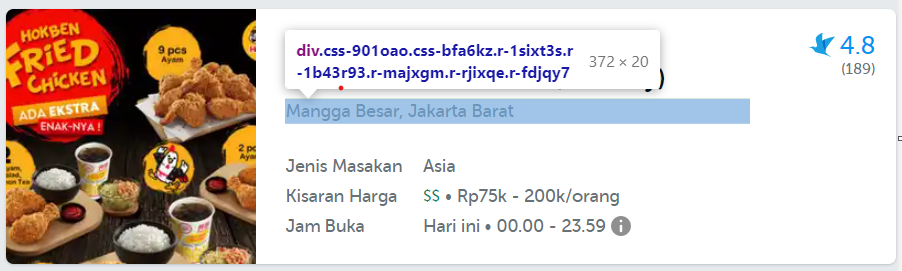

***Mengambil element diatas untuk mendapatkan data lokasi.***

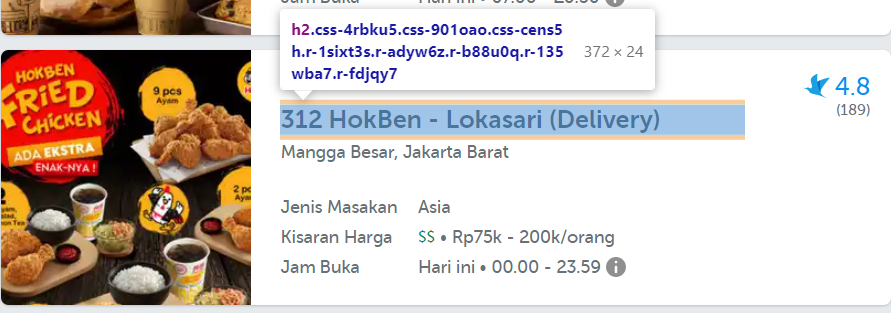

***Mengambil element diatas untuk mendapatkan data nama restoran.***

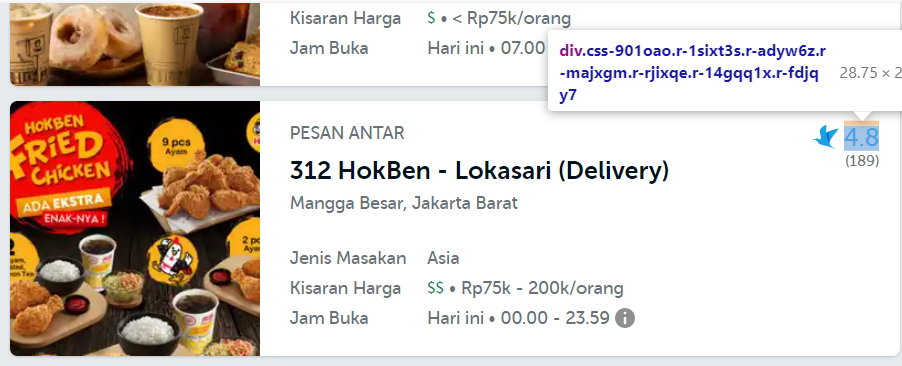

***Mengambil element diatas untuk mendapatkan data rating restoran.***

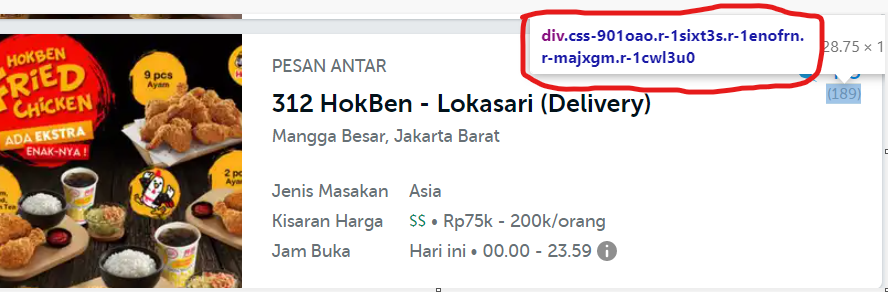

***Mengambil element diatas untuk mendapatkan data ulasan restoran.***

In [4]:
for a in soup.findAll(attrs={'class':'css-1dbjc4n r-1habvwh r-14lw9ot r-kdyh1x r-da5iq2 r-13awgt0 r-18u37iz r-1h0z5md r-6gpygo r-bztko3'}):
    lokasi = a.find('div', attrs={'class':'css-901oao css-bfa6kz r-1sixt3s r-1b43r93 r-b88u0q r-rjixqe r-fdjqy7'})
    rating = a.find('div', attrs={'class' : 'css-901oao r-1sixt3s r-adyw6z r-majxgm r-rjixqe r-14gqq1x r-fdjqy7'})
    review = a.find('div', attrs={'class' : 'css-901oao r-1sixt3s r-1enofrn r-majxgm r-1cwl3u0'})
    nama = a.find('h2', attrs={'class' : 'css-4rbku5 css-901oao css-cens5h r-1sixt3s r-adyw6z r-b88u0q r-135wba7 r-fdjqy7'})
    nama_resto.append(nama.text)
    locations.append(lokasi.text)
    ratings.append(rating.text)
    reviews.append(review.text)

In [25]:
df = pd.DataFrame({'Nama resto':nama_resto,'Lokasi':locations, 'Rating':ratings, 'Review':reviews})
df.to_csv('products.csv', index=False, encoding='utf-8')

In [26]:
df

,Nama resto,Lokasi,Rating,Review
0,Madcoco - Mall Of Indonesia (Delivery),"Mall Of Indonesia (MOI), Jakarta Utara",4.5,(2)
1,312 HokBen - Lokasari (Delivery),"Mangga Besar, Jakarta Barat",4.9,(177)
2,Toko Kopi Tuku - Santa (Delivery),"Senopati, Jakarta Selatan",4.7,(100)
3,Pisang Goreng Madu Bu Nanik - Tanjung Duren (D...,"Tanjung Duren, Jakarta Barat",4.8,(56)
4,Wingheng Dimsum - Tanjung Duren (Delivery),"Tanjung Duren, Jakarta Barat",4.8,(56)
5,527 HokBen - Ruko Tebet (Delivery),"Tebet, Jakarta Selatan",4.6,(71)
6,Restoran Sederhana - S.A Satrio (Delivery),"Setiabudi, Jakarta Selatan",4.7,(78)
7,Toko Kopi Tuku - Kemanggisan (Delivery),"Palmerah, Jakarta Barat",4.9,(70)
8,Bun Hiang - Cengkareng (Delivery),"Cengkareng Barat, Jakarta Barat",4.7,(79)
9,Mixue - Danau Sunter (Delivery),"Sunter, Jakarta Utara",4.3,(20)


In [14]:
df.sample(5)

,Nama resto,Lokasi,Rating,Review
7,Toko Kopi Tuku - Kemanggisan (Delivery),"Palmerah, Jakarta Barat",4.9,(70)
5,527 HokBen - Ruko Tebet (Delivery),"Tebet, Jakarta Selatan",4.6,(71)
6,Restoran Sederhana - S.A Satrio (Delivery),"Setiabudi, Jakarta Selatan",4.7,(78)
2,Toko Kopi Tuku - Santa (Delivery),"Senopati, Jakarta Selatan",4.7,(100)
3,Pisang Goreng Madu Bu Nanik - Tanjung Duren (D...,"Tanjung Duren, Jakarta Barat",4.8,(56)


# Web Scraping Using BeautifulSoup4 with table

In [15]:
res = requests.get("http://www.nationmaster.com/country-info/stats/Media/Internet-users")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))[0]
countries = df["COUNTRY"].tolist()
users = df["AMOUNT"].tolist()

In [16]:
df

,#,COUNTRY,AMOUNT,DATE,GRAPH,HISTORY
0,1,China,389 million,2009,NaN,NaN
1,2,United States,245 million,2009,NaN,NaN
2,3,Japan,99.18 million,2009,NaN,NaN
3,NaN,Group of 7 countries (G7) average (profile),80.32 million,2009,NaN,NaN
4,4,Brazil,75.98 million,2009,NaN,NaN
...,...,...,...,...,...,...
244,214,Niue,1100,2009,NaN,NaN
245,=215,"Saint Helena, Ascension, and Tristan da Cunha",900,2009,NaN,NaN
246,=215,Saint Helena,900,2009,NaN,NaN
247,217,Tokelau,800,2008,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   #        218 non-null    object 
 1   COUNTRY  249 non-null    object 
 2   AMOUNT   249 non-null    object 
 3   DATE     249 non-null    int64  
 4   GRAPH    0 non-null      float64
 5   HISTORY  0 non-null      float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.8+ KB
